# Rank Table

(10.30)

- 시즌, 리그별 최종 순위와 승점을 가져오는 코드입니다.
- 데이터는 The Fishy 사이트를 사용했습니다.
- https://thefishy.co.uk/

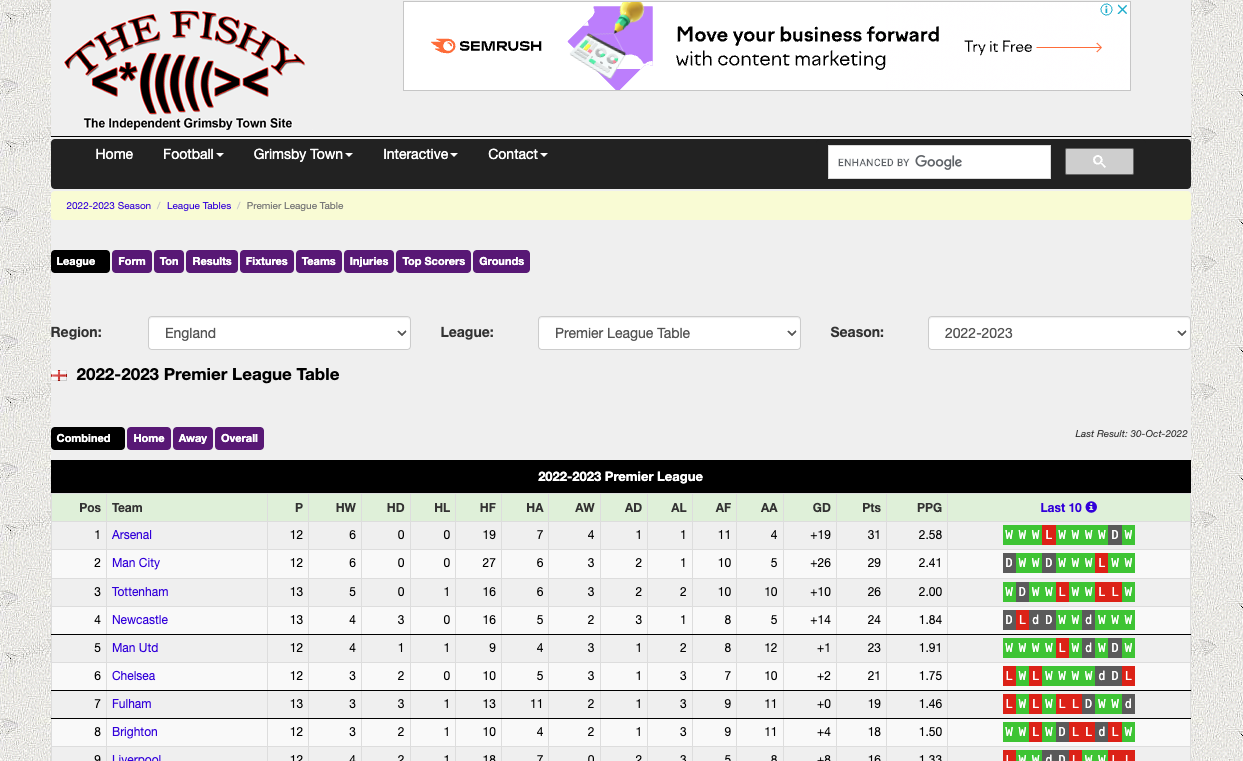

In [10]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import requests
import re

from bs4 import BeautifulSoup

In [3]:
# Fishy URL을 활용하여 리그별 적절한 코드 연결
league_dict = {'Premier League': 1, 'League 1': 34, 'Bundesliga': 32, 'Serie A': 33, 'La Liga': 31}

In [4]:
# 5대 리그의 2005년부터의 랭크를 가져오는 함수 정의
def get_table(year, league):
    url = 'https://thefishy.co.uk/leaguetable.php?table={}&season={}'.format(league_dict[league], year-2002)
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'lxml')
    
    num_teams = 20
    if league == 'Bundesliga':  # 분데스리가는 18개의 팀
        num_teams = 18
    
    # HTML 코드로부터 적절한 데이터 연결
    team_scripts = soup.find_all('td', {'class': 'cats'})[:num_teams]
    point_scripts = soup.find_all('td')
    
    # 팀 리스트 생성
    teams = []
    for i in team_scripts:
        teams.append(i.string) 
    
    # 승점을 찾아 리스트에 입력
    points = []
    max_scripts = 425
    if league == 'Bundesliga':
        max_scripts = 383
    for i in range(23, max_scripts, 21):
        points.append(point_scripts[i].string)
    
    # 데이터프레임 생성
    df = pd.DataFrame(list(zip(teams, points)),
               columns =['team', 'points'])
    df['league'] = league
    df['year'] = year
    return df

In [9]:
# 샘플 출력
get_table(2021, 'Premier League')

,team,points,league,year
0,Man City,93,Premier League,2021
1,Liverpool,92,Premier League,2021
2,Chelsea,74,Premier League,2021
3,Tottenham,71,Premier League,2021
4,Arsenal,69,Premier League,2021
5,Man Utd,58,Premier League,2021
6,West Ham,56,Premier League,2021
7,Leicester,52,Premier League,2021
8,Brighton,51,Premier League,2021
9,Wolverhampton,51,Premier League,2021
